In [94]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import config

def load_data(file) -> DataFrame:
    # Load the data from the csv file
    return pd.read_csv(f"{config.csv_folder}/{file}", converters={'isodt': lambda x: pd.to_datetime(x.split('T')[0])}, dtype={'epochdt': 'int64'})


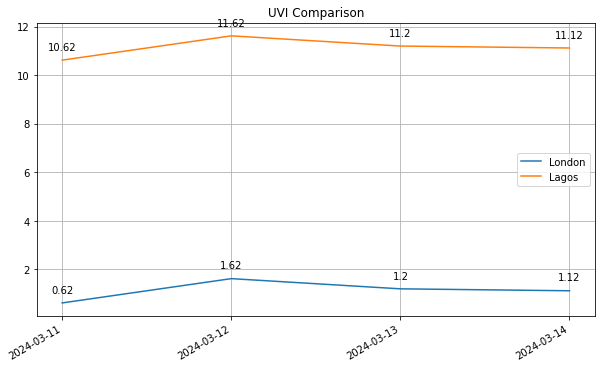

In [95]:

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

df_london= load_data("uvi_london.csv")
df_lagos= load_data("uvi_lagos.csv")

# Plot the data
plt.plot(df_london['isodt'].values, df_london['uvi'].values, label= 'London')
plt.plot(df_lagos['isodt'].values, df_lagos['uvi'].values, label= 'Lagos')

# Create a DateFormatter for the x-axis
ax = plt.gca()
day_locator = mdates.DayLocator()
ax.xaxis.set_major_locator(day_locator)

# Add grid lines
ax.grid(True)

# Customize the legend
legend = ax.legend(frameon=True, framealpha=1, shadow=True, borderpad=1)

# Rotate date labels automatically
plt.gcf().autofmt_xdate()

# Annotate each point with its value
for x, y in zip(df_london['isodt'].values, df_london['uvi'].values):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Annotate each point with its value
for x, y in zip(df_lagos['isodt'].values, df_lagos['uvi'].values):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')


# Add a title
plt.title('UVI Comparison')
# Adjust the subplot parameters to make room for the title
# plt.subplots_adjust(top=1.5, bottom=0.5, left=0.10, right=1, hspace=1.25, wspace=1.2)

plt.legend()
plt.show()